In [95]:
import pandas as pd

In [96]:
survey_raw_df = pd.read_csv('survey_results_public2020.csv')

In [97]:
survey_raw_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [98]:
# Checking the columns in dataframe
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [99]:
# Loading the Question file
schema_df = pd.read_csv('survey_results_schema2020.csv')

In [100]:
schema_df.set_index('Column', inplace = True)

In [101]:
#Getting Series from Dataframe
schema_raw = schema_df.QuestionText

Now we can use schema_raw() to retrieve full question

In [102]:
schema_raw['YearsCodePro']

'NOT including education, how many years have you coded professionally (as a part of your work)?'

Now, we've successfully loaded the dataset of stackoverflow annual survey. We have loaded two datasets: (i) survey_raw_df contains responses of public to questions (ii) schema_raw contains questions asked to public

# Data Preparation & Cleaning

Now there are total 61 columns. But we will perform EDA only on specific columns focusing on 'Demographics', 'Programming Experience', 'Employment'.

In [103]:
# We''ll work only on this selected columns
selected_columns = [
    #Demographics
    'Country', 'Age', 'Gender', 'EdLevel', 'UndergradMajor',
    #Programming Experience
    'Hobbyist','Age1stCode','YearsCode','YearsCodePro','LanguageWorkedWith','LanguageDesireNextYear','NEWLearn','NEWStuck',
    #Employment
    'Employment','DevType','WorkWeekHrs','JobSat','JobFactors','NEWOvertime','NEWEdImpt'
]

In [104]:
len(selected_columns)

20

In [105]:
survey_df = survey_raw_df[selected_columns].copy()

In [106]:
schema = schema_raw[selected_columns]

Let's view some basic information about dataframe

In [107]:
survey_df.shape

(64461, 20)

In [108]:
schema.shape

(20,)

In [109]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

Columns like Age1stCode, YearsCode & YearsCodePro can also have numeric datatype

In [110]:
schema.Age1stCode

'At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)'

In [111]:
survey_df.Age1stCode.unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '54', '48', '56',
       '45', '44', '34', 'Older than 85', '39', '51', '68', '50', '37',
       '47', '43', '52', '85', '64', '55', '58', '49', '76', '72', '73',
       '83', '63'], dtype=object)

In [112]:
# Now we want to replace the string values like Younger than 5 years or Older than 85 to blank(nan)
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors = 'coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors = 'coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors = 'coerce')

errors = 'coerce' is used to ignore errors

In [113]:
#Let's view some basic statistics about numeric column
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


### Age - There seems to be problem with Age column. As min age cannot be 1 & max age cannot be 279

drop() - Method used to delete rows containing invalid data

In [114]:
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace = True)

In [115]:
survey_df.Age > 100

0        False
1        False
2        False
3        False
4        False
         ...  
64456    False
64457    False
64458    False
64459    False
64460    False
Name: Age, Length: 64452, dtype: bool

In [116]:
survey_df[survey_df.Age > 100]

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
14375,Netherlands,279.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16.0,7.0,3.0,C++,Swift,Once every few years,Play games;Call a coworker or friend;Visit Sta...,Employed full-time,"Developer, mobile",40.0,Slightly satisfied,Industry that I’d be working in;Specific depar...,Never,Very important


In [117]:
survey_df[survey_df.Age > 100].index

Index([14375], dtype='int64')

In [118]:
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace = True)

### WorkWeekHrs - There seems to be problem with WorkWeekHrs column. As max WorkWeekHrs cannot be 475 

Let's Ignore the entries where the value for the column is higher than 140 hours i.e 20 hours per day

In [119]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index , inplace = True)

In [120]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45319.000000,57326.000000,56636.000000,43993.000000,41002.000000
mean,30.832322,15.475317,12.783883,8.873003,40.024395
std,9.505965,5.114952,9.494519,7.762089,10.630010
min,10.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,43.000000
max,99.000000,85.000000,50.000000,50.000000,140.000000


### Gender column (sometimes) has multiple values

We'll simplify our analysis by removing data that has multiple values for a single gender question

In [121]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [122]:
survey_df.Gender.unique()

array(['Man', nan, 'Woman',
       'Man;Non-binary, genderqueer, or gender non-conforming',
       'Non-binary, genderqueer, or gender non-conforming',
       'Woman;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man'], dtype=object)

In [123]:
survey_df.Gender.value_counts()

Gender
Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: count, dtype: int64

So we'll going to replace columns with multiple genger data to blank columns<br>
The column's containing multiple gender values can be identified using ';' as semi-colon is used to put multiple values

In [124]:
import numpy as np

In [125]:
survey_df.where(~(survey_df.Gender.str.contains(';', na = False)), np.nan, inplace = True)

In [126]:
survey_df.Gender.value_counts()

Gender
Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: count, dtype: int64

In [127]:
# Seeing Random 10 rows
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
40299,Australia,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN
45675,Australia,28.0,Man,"Other doctoral degree (Ph.D., Ed.D., etc.)","Computer science, computer engineering, or sof...",Yes,11.0,9.0,2.0,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;P...,NaN,NaN,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...",Academic researcher;Data or business analyst;E...,38.0,Slightly satisfied,Diversity of the company or organization;Flex ...,Rarely: 1-2 days per year or less,Fairly important
50926,Switzerland,46.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,10.0,36.0,20.0,C#,C#,Every few months,Meditate;Call a coworker or friend;Visit Stack...,Employed full-time,"Data or business analyst;Developer, back-end;D...",40.0,Very satisfied,Diversity of the company or organization;Langu...,Rarely: 1-2 days per year or less,Critically important
54758,Bulgaria,29.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Mathematics or statistics,Yes,18.0,6.0,6.0,Julia;Python;R;Scala;SQL;Swift,Julia;Python;R;Scala;SQL;Swift,Every few months,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,Data scientist or machine learning specialist,40.0,Very satisfied,Diversity of the company or organization;Remot...,Rarely: 1-2 days per year or less,Not at all important/not necessary
51939,United States,NaN,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","A business discipline (such as accounting, fin...",Yes,18.0,7.0,3.0,HTML/CSS;Java;JavaScript;SQL;TypeScript,C++;Go;Python;Rust,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, full-stack",NaN,Slightly dissatisfied,How widely used or impactful my work output wo...,Often: 1-2 days per week or more,Not at all important/not necessary
10079,Portugal,26.0,Woman,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",No,16.0,6.0,2.0,Bash/Shell/PowerShell;Haskell;HTML/CSS;Java;Ja...,Bash/Shell/PowerShell;Go;HTML/CSS;Java;JavaScr...,Once a year,Play games;Visit Stack Overflow;Panic;Watch he...,Employed full-time,"Developer, full-stack",8.0,Slightly satisfied,Industry that I’d be working in;Flex time or a...,Often: 1-2 days per week or more,NaN
4499,Algeria,24.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","A humanities discipline (such as literature, h...",Yes,17.0,7.0,NaN,HTML/CSS;JavaScript;PHP;SQL,Bash/Shell/PowerShell;C;Dart;HTML/CSS;JavaScri...,Every few months,Visit Stack Overflow;Go for a walk or other ph...,"Not employed, but looking for work","Developer, full-stack",NaN,NaN,NaN,NaN,Not at all important/not necessary
6552,India,NaN,Man,I never completed any formal education,NaN,Yes,20.0,10.0,9.0,HTML/CSS;Java;JavaScript;Kotlin;SQL,Dart;Go,Once a year,Visit Stack Overflow;Watch help / tutorial videos,Employed full-time,"Designer;Developer, desktop or enterprise appl...",NaN,Very satisfied,Flex time or a flexible schedule;Remote work o...,Sometimes: 1-2 days per month but less than we...,NaN
56427,France,24.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Web development or web design,Yes,14.0,4.0,2.0,Bash/Shell/PowerShell;Go;Java;JavaScript;Kotli...,Go;JavaScript;Kotlin;PHP;SQL;TypeScript,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, back-end;Developer, full-stack;Deve...",35.0,Very satisfied,"Flex time or a flexible schedule;Languages, fr...",Often: 1-2 days per week or more,Not at all important/not necessary
20621,Australia,27.0,Woman,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Mathematics or statistics,No,19.0,8.0,2.0,Bash/Shell/PowerShell;

# Step 3 - EDA & Visualization

In [150]:
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt

In [151]:
# Setting backround of graphs
sns.set_style('darkgrid')

In [152]:
# Setting default parameters
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9,5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Country

Let's look at the no.of countries from which there are responses in the survey and plot the 10 countries with the highest no. of responses

In [132]:
schema.Country

'Where do you live?'

In [134]:
survey_df.Country.unique()

array(['Germany', 'United Kingdom', 'Russian Federation', 'Albania',
       'United States', 'India', 'Tunisia', 'Spain', 'Netherlands',
       'France', 'Belgium', 'Portugal', 'Canada', 'China', 'Ukraine',
       'Italy', 'Brazil', 'Austria', 'Mexico', 'Sweden', 'Poland',
       'Indonesia', 'Greece', 'Israel', 'Czech Republic', nan,
       'Bosnia and Herzegovina', 'Bulgaria', 'Serbia', 'Switzerland',
       'Hungary', 'Nepal', 'Slovenia', 'Uruguay', 'Denmark', 'Pakistan',
       'Taiwan', 'Romania', 'Finland', 'Costa Rica', 'Nigeria', 'Chile',
       'Turkey', 'Panama', 'Ireland', 'Estonia', 'Philippines',
       'Australia', 'Nomadic', 'Peru', 'Cyprus', 'Sri Lanka', 'Kenya',
       'Norway', 'Iran', 'Croatia', 'Egypt', 'Argentina', 'Ghana',
       'Latvia', 'Morocco', 'Bangladesh', 'Ecuador', 'Haiti',
       'Venezuela, Bolivarian Republic of...', 'Colombia', 'Lithuania',
       'El Salvador', 'Honduras', 'Ethiopia', 'Lebanon', 'Uganda',
       'Algeria', 'Viet Nam', 'Guatemala', '

In [135]:
#Counting the unique values
survey_df.Country.nunique()

183

In [138]:
#Checking the countriwise respose to survey (of 10 countries with highest responses)
top_countries = survey_df.Country.value_counts().head(10)
top_countries

Country
United States     12371
India              8364
United Kingdom     3881
Germany            3864
Canada             2175
France             1884
Brazil             1804
Netherlands        1332
Poland             1259
Australia          1199
Name: count, dtype: int64

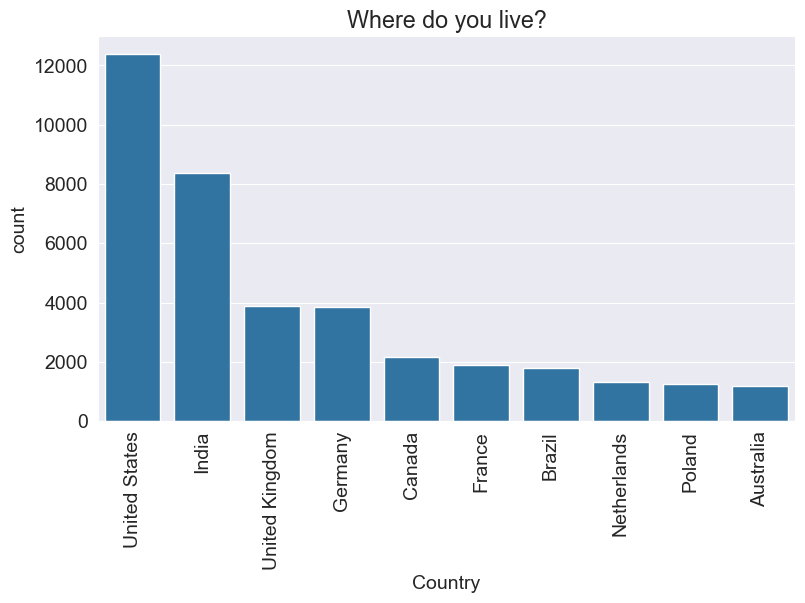

<Figure size 1200x600 with 0 Axes>

In [153]:
# Visualizing this information using bar chart
plt.title(schema.Country);
sns.barplot(x=top_countries.index, y=top_countries);
plt.xticks(rotation = 90);
plt.figure(figsize = (12, 6));

## Age

We'll check the distribution of Age

In [176]:
schema.Age

'What is your age (in years)? If you prefer not to answer, you may leave this question blank.'

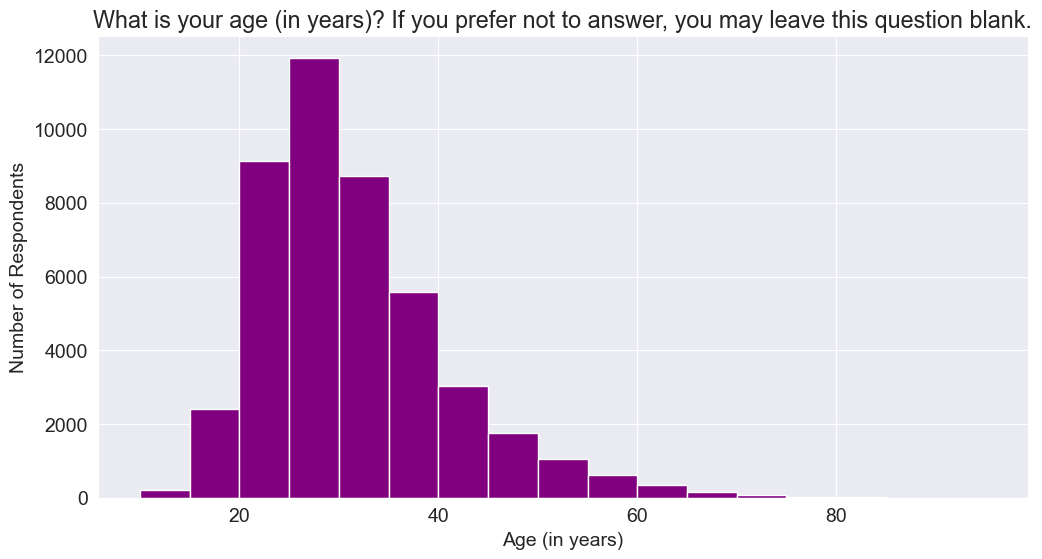

In [182]:
plt.figure(figsize = (12, 6));
plt.title(schema.Age)
plt.hist(survey_df.Age, bins = np.arange(10, 100, 5), color = 'purple');
plt.xlabel('Age (in years)');
plt.ylabel('Number of Respondents');

## Gender

In [183]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [196]:
gender_counts = survey_df.Gender.value_counts(dropna = False)
gender_counts

Gender
Man                                                  45895
NaN                                                  14191
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: count, dtype: int64

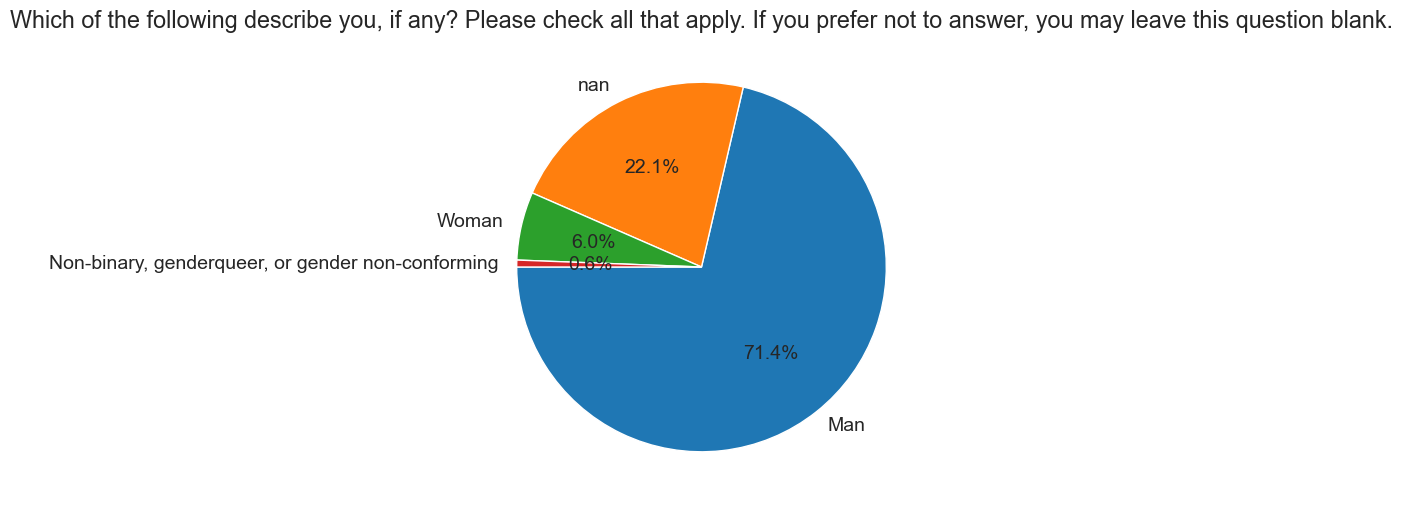

In [198]:
# Drawing Pie chart for this
plt.figure(figsize = (12, 6));
plt.title(schema.Gender);
plt.pie(gender_counts, labels = gender_counts.index, autopct = '%1.1f%%', startangle = 180);

## Education Level

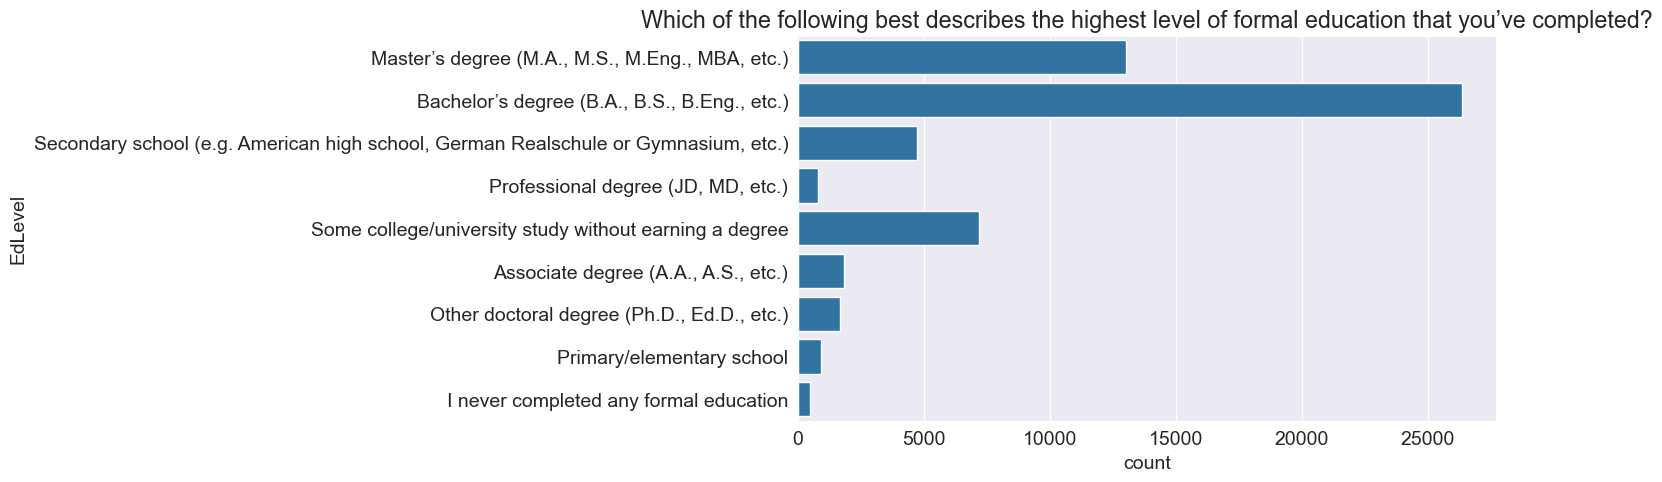

In [205]:
plt.title(schema.EdLevel);
sns.countplot(y=survey_df.EdLevel);

In [206]:
schema.UndergradMajor

'What was your primary field of study?'

In [209]:
survey_df.UndergradMajor.value_counts()

UndergradMajor
Computer science, computer engineering, or software engineering                   31353
Another engineering discipline (such as civil, electrical, mechanical, etc.)       4735
Information systems, information technology, or system administration              4041
A natural science (such as biology, chemistry, physics, etc.)                      2185
Mathematics or statistics                                                          1836
Web development or web design                                                      1773
A business discipline (such as accounting, finance, marketing, etc.)               1367
A humanities discipline (such as literature, history, philosophy, etc.)             997
A social science (such as anthropology, psychology, political science, etc.)        922
Fine arts or performing arts (such as graphic design, music, studio art, etc.)      715
I never declared a major                                                            448
A health science 

In [210]:
survey_df.UndergradMajor.count()

50619

In [211]:
undergrad_pct = survey_df.UndergradMajor.value_counts() * 100 / survey_df.UndergradMajor.count()
undergrad_pct

UndergradMajor
Computer science, computer engineering, or software engineering                   61.939193
Another engineering discipline (such as civil, electrical, mechanical, etc.)       9.354195
Information systems, information technology, or system administration              7.983168
A natural science (such as biology, chemistry, physics, etc.)                      4.316561
Mathematics or statistics                                                          3.627097
Web development or web design                                                      3.502637
A business discipline (such as accounting, finance, marketing, etc.)               2.700567
A humanities discipline (such as literature, history, philosophy, etc.)            1.969616
A social science (such as anthropology, psychology, political science, etc.)       1.821450
Fine arts or performing arts (such as graphic design, music, studio art, etc.)     1.412513
I never declared a major                                         

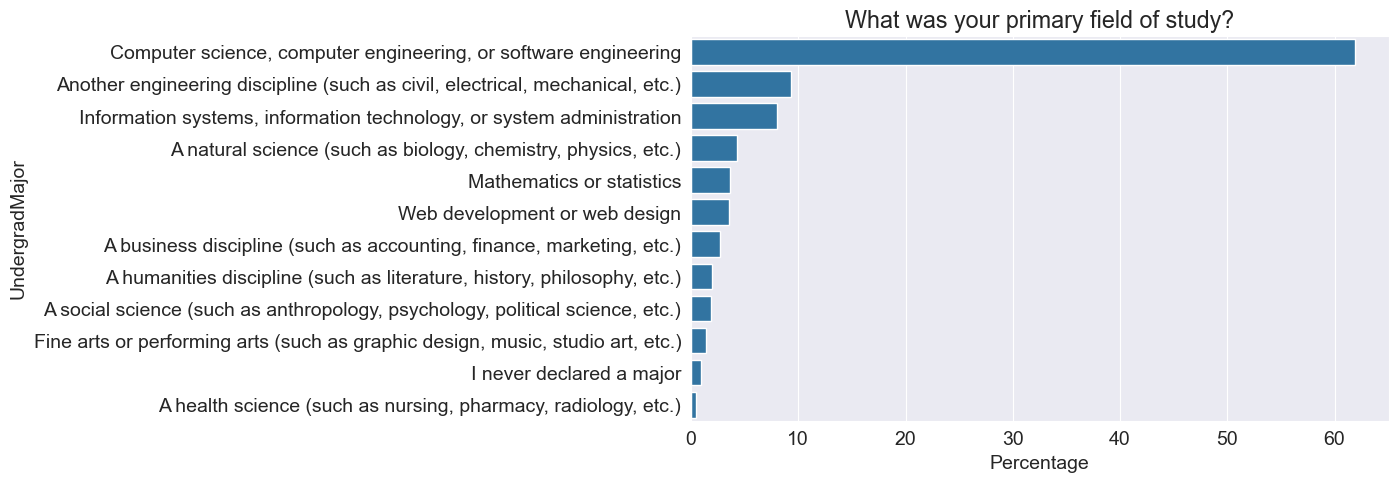

In [217]:
sns.barplot(x = undergrad_pct, y = undergrad_pct.index);
plt.xlabel('Percentage');
plt.title(schema.UndergradMajor);

## Employment

In [218]:
schema.Employment

'Which of the following best describes your current employment status?'

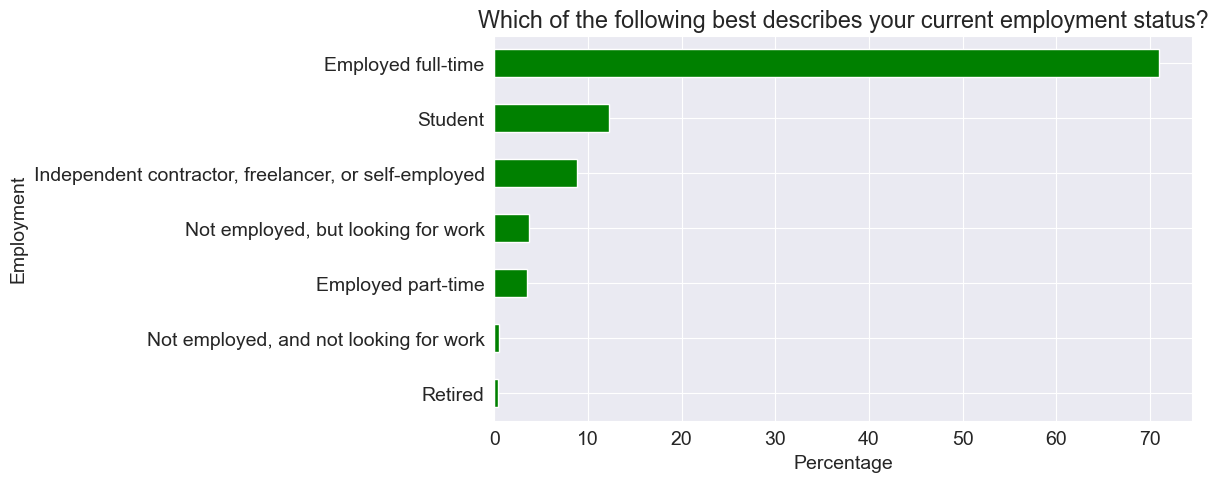

In [222]:
# normalize=True gives percentage
(survey_df.Employment.value_counts(normalize=True, ascending=True) * 100).plot(kind='barh',color = 'g');
plt.title(schema.Employment);
plt.xlabel('Percentage');